# Evaluation of 2-digits CPV classifier based on similarity between notices
## Load dataset
Data are coming as output of 20231107-closest_notices_from_history.ipynb

In [1]:
import json
with open('20231108-predict_cpv_closest_20_with_scores_train_80.json', 'r') as f:
    full_predictions = json.load(f)

In [2]:
print(full_predictions[0])

[{'pred': ['66000000'], 'score': 0.6569411158561707}, {'pred': ['66523100', '66520000', '66522000'], 'score': 0.6087358593940735}, {'pred': ['79410000', '79430000'], 'score': 0.5991131663322449}, {'pred': ['79411000'], 'score': 0.5982860326766968}, {'pred': ['72000000'], 'score': 0.5880882143974304}, {'pred': ['48300000'], 'score': 0.5859005451202393}, {'pred': ['75320000'], 'score': 0.5770848989486694}, {'pred': ['48410000'], 'score': 0.5765272378921509}, {'pred': ['90500000', '63121100', '63121000', '90512000', '90514000', '90513000', '75130000', '63120000', '90510000', '63122000', '90513300', '75131000', '60100000'], 'score': 0.5551028847694397}, {'pred': ['45000000', '45210000'], 'score': 0.5546371936798096}, {'pred': ['45000000', '45210000'], 'score': 0.5546371936798096}, {'pred': ['85000000'], 'score': 0.5539848804473877}, {'pred': ['85000000'], 'score': 0.5526933670043945}, {'pred': ['75211000'], 'score': 0.551079511642456}, {'pred': ['72510000'], 'score': 0.5497228503227234}, {

## Format CPVs to only keep requested numbers of digits

In [3]:
def extract_cpvs_from_full_cpv(local_cpvs, number_digits):
    divisions = []
    local_cpvs = [str(local_cpv) for local_cpv in local_cpvs]
    for local_cpv in local_cpvs:
        if len(local_cpv) < 7:
           continue
        if len(local_cpv) == 7:
            local_cpv = "0"+local_cpv
        division = local_cpv[:number_digits]
        if division not in divisions:
            divisions.append(division)
    return divisions

In [4]:
# Convert CPVS to division

NUMBER_DIGITS_CPV = 2

for element in full_predictions:
    local_cpvs = []
    for sub_element in element:
        if 'pred' in sub_element.keys():
            reduced_cpvs = extract_cpvs_from_full_cpv(sub_element['pred'], NUMBER_DIGITS_CPV)
            sub_element['pred'] = reduced_cpvs
        else:
            reduced_cpvs = extract_cpvs_from_full_cpv(sub_element['actual_cpvs'], NUMBER_DIGITS_CPV)
            sub_element['actual_cpvs'] = reduced_cpvs
print(full_predictions[0])

[{'pred': ['66'], 'score': 0.6569411158561707}, {'pred': ['66'], 'score': 0.6087358593940735}, {'pred': ['79'], 'score': 0.5991131663322449}, {'pred': ['79'], 'score': 0.5982860326766968}, {'pred': ['72'], 'score': 0.5880882143974304}, {'pred': ['48'], 'score': 0.5859005451202393}, {'pred': ['75'], 'score': 0.5770848989486694}, {'pred': ['48'], 'score': 0.5765272378921509}, {'pred': ['90', '63', '75', '60'], 'score': 0.5551028847694397}, {'pred': ['45'], 'score': 0.5546371936798096}, {'pred': ['45'], 'score': 0.5546371936798096}, {'pred': ['85'], 'score': 0.5539848804473877}, {'pred': ['85'], 'score': 0.5526933670043945}, {'pred': ['75'], 'score': 0.551079511642456}, {'pred': ['72'], 'score': 0.5497228503227234}, {'pred': ['45'], 'score': 0.549191415309906}, {'pred': ['98', '85'], 'score': 0.5485222339630127}, {'pred': ['98', '85'], 'score': 0.5454405546188354}, {'pred': ['79'], 'score': 0.5453060269355774}, {'pred': ['72', '75', '79', '66', '85'], 'score': 0.5416351556777954}, {'actua

In [5]:
ALL_REDUCED_CPVS = []

for element in full_predictions:
    local_cpvs = []
    for sub_element in element:
        if 'pred' in sub_element.keys():
            pred_values = sub_element['pred']
            local_cpvs.extend(pred_values)
        else:
            actual_values = sub_element['actual_cpvs']
            local_cpvs.extend(actual_values)
    ALL_REDUCED_CPVS.extend(local_cpvs)
    ALL_REDUCED_CPVS = list(set(ALL_REDUCED_CPVS))
    
print(len(ALL_REDUCED_CPVS))


45


Function to plot metrics

In [6]:
import numpy as np
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt


def calculate_metrics_and_plot(y_true, y_pred):
    thresholds = np.arange(0.1, 1.0, 0.05) 
    precision_scores = []
    recall_scores = []
    f1_scores = []
    best_f1_micro = 0.0
    best_threshold = 0.0

    for threshold in thresholds:
        binary_predictions = (y_pred >= threshold).astype(int)
        precision = precision_score(y_true, binary_predictions, average='micro')
        recall = recall_score(y_true, binary_predictions, average='micro')
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        if f1 > best_f1_micro:
            best_f1_micro = f1
            best_threshold = threshold

    print(f"Best F1 Micro Score: {best_f1_micro:.2f} (Threshold: {best_threshold:.2f})")

    # Plot the micro precision as a function of the threshold
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, precision_scores, marker='o', linestyle='-', label='Micro Precision')
    plt.xlabel('Threshold')
    plt.ylabel('Micro Precision')
    plt.title('Micro Precision vs. Threshold')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot the micro recall as a function of the threshold
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, recall_scores, marker='o', linestyle='-', label='Micro Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Micro Recall')
    plt.title('Micro Recall vs. Threshold')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot the F1 micro score as a function of the threshold
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, f1_scores, marker='o', linestyle='-', label='F1 Micro Score')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Micro Score')
    plt.title('F1 Micro Score vs. Threshold')
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(recall_scores, precision_scores, marker='o', linestyle='-', label='Precision-Recall Curve')
    plt.xlabel('Micro Recall')
    plt.ylabel('Micro Precision')
    plt.title('Micro Precision-Recall Curve')
    plt.grid(True)
    plt.legend()
    plt.show()

## Evaluation Method 1

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11421701908111573, 0.08292329013347625, 0.0, 0.0, 0.027755144238471984, 0.0, 0.11124512255191803, 0.1371138095855713, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05469813942909241, 0.0, 0.09036560654640198, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.027755144238471984, 0.0, 0.08397231101989747, 0.0, 0.0, 0.027755144238471984, 0.0, 0.058121389150619505, 0.0, 0.0, 0.0]
Best F1 Micro Score: 0.66 (Threshold: 0.20)


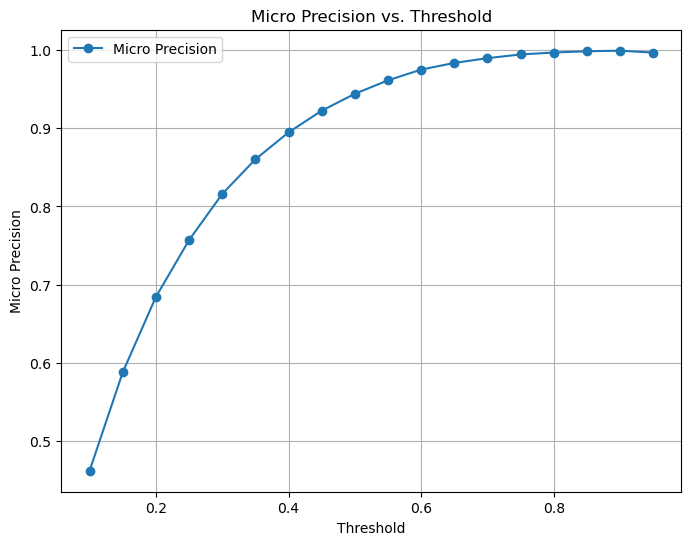

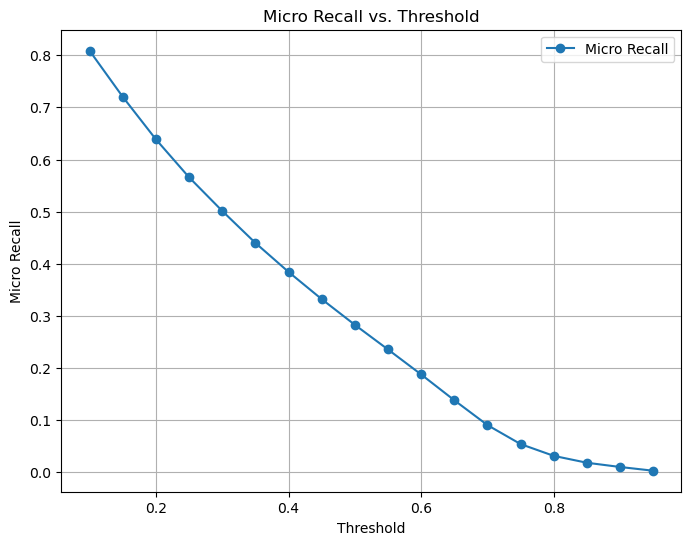

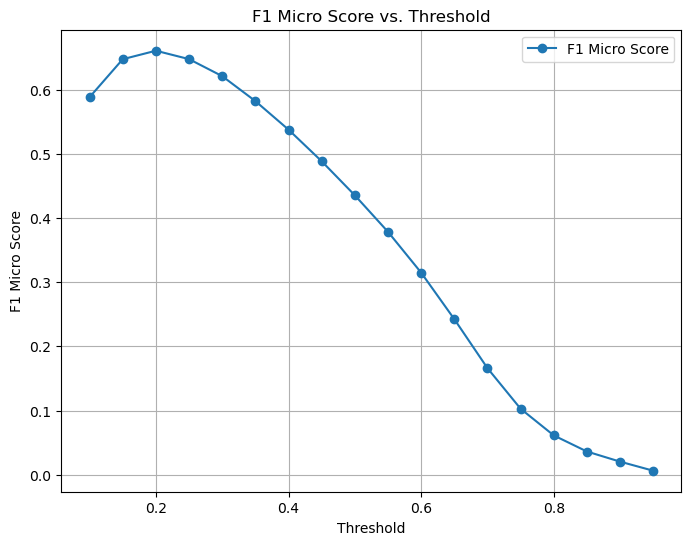

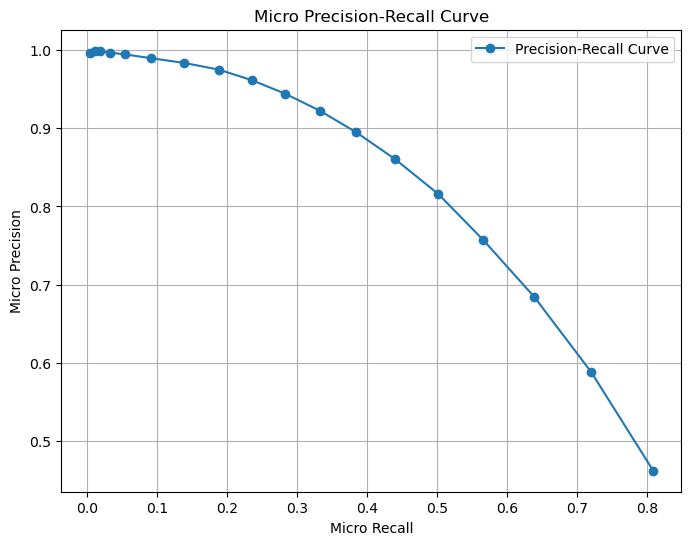

In [7]:
formatted_result_actual = []
formatted_result_pred = []

for element in full_predictions:
    single_row_pred = [0.0]*len(ALL_REDUCED_CPVS)
    single_row_actual = [0.0]*len(ALL_REDUCED_CPVS)
    cpv_found_and_scores = {}
    length_number_pred = len(element) - 1
    for single_pred in element:
        if 'actual_cpvs' in single_pred.keys():
            actual_values = single_pred["actual_cpvs"]
            for actual_value in actual_values:
                index_in_all_cpvs = ALL_REDUCED_CPVS.index(actual_value)
                single_row_actual[index_in_all_cpvs] = 1.0
        else:
            pred_values = single_pred["pred"]
            score_pred = single_pred["score"]
            for pred_value in pred_values:
                if not cpv_found_and_scores.get(pred_value):
                    cpv_found_and_scores[pred_value] = score_pred
                else:
                    cpv_found_and_scores[pred_value] = cpv_found_and_scores[pred_value] + score_pred
    for key, value in cpv_found_and_scores.items():
        index_cpv = ALL_REDUCED_CPVS.index(key)
        normalized_score = value/length_number_pred
        single_row_pred[index_cpv] = normalized_score
    formatted_result_actual.append(single_row_actual)
    formatted_result_pred.append(single_row_pred)
print(formatted_result_pred[0])

calculate_metrics_and_plot(formatted_result_actual, formatted_result_pred)

## Evaluation Method 2

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11258679352557663, 0.038971620864297424, 0.0, 0.0, 0.017143569069887343, 0.0, 0.05852657453506826, 0.04956731800079222, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01739099344575258, 0.0, 0.27472549365114446, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.017143569069887343, 0.0, 0.050405979300032586, 0.0, 0.0, 0.017143569069887343, 0.0, 0.04717295073113574, 0.0, 0.0, 0.0]
Best F1 Micro Score: 0.76 (Threshold: 0.25)


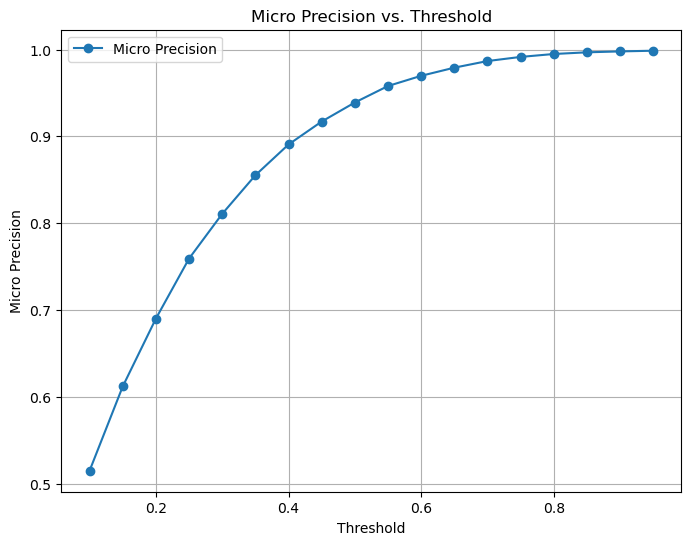

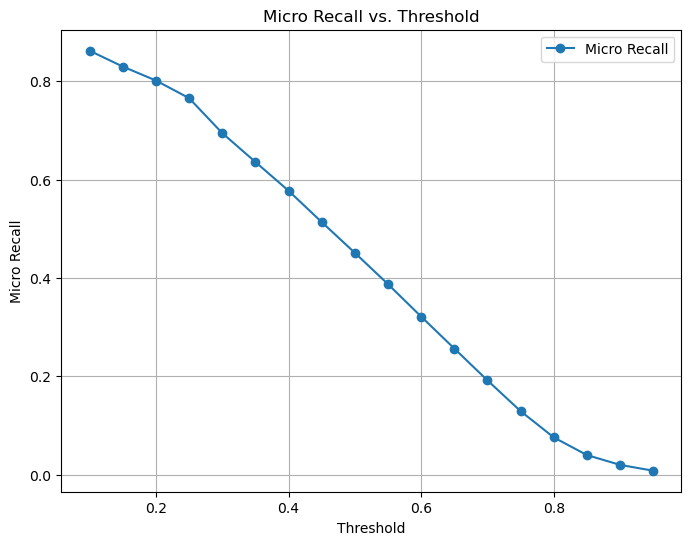

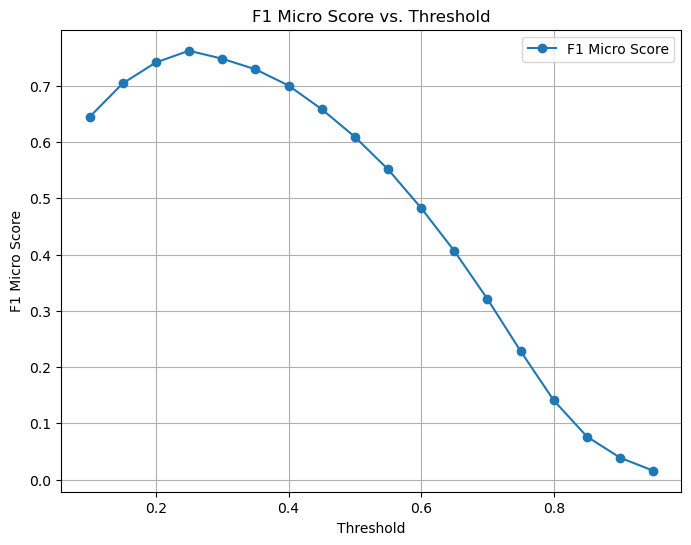

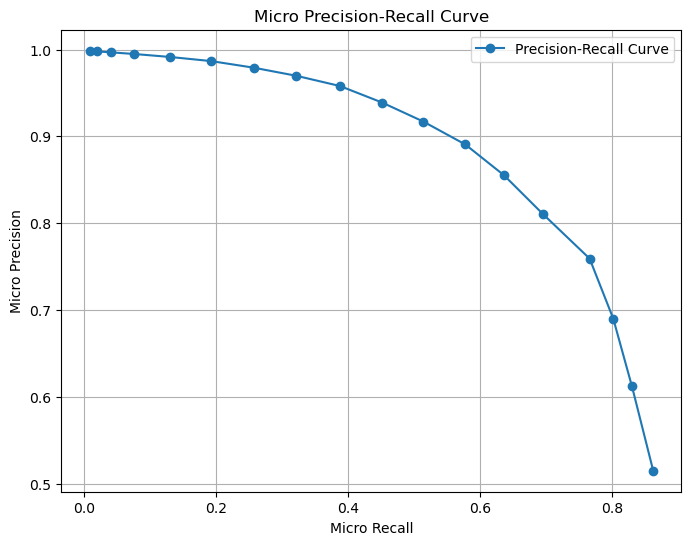

In [8]:
formatted_result_actual = []
formatted_result_pred = []
normalized_factor = 0
for i in range(1, 21):
    normalized_factor += 1/i
    
for element in full_predictions:
    single_row_pred = [0.0]*len(ALL_REDUCED_CPVS)
    single_row_actual = [0.0]*len(ALL_REDUCED_CPVS)
    cpv_found_and_scores = {}
    length_number_pred = len(element) - 1
    position = 0
    for single_pred in element:
        if 'actual_cpvs' in single_pred.keys():
            actual_values = single_pred["actual_cpvs"]
            for actual_value in actual_values:
                index_in_all_cpvs = ALL_REDUCED_CPVS.index(actual_value)
                single_row_actual[index_in_all_cpvs] = 1.0
        else:
            position += 1
            pred_values = single_pred["pred"]
            score_pred = single_pred["score"]
            for pred_value in pred_values:
                if not cpv_found_and_scores.get(pred_value):
                    cpv_found_and_scores[pred_value] = score_pred / position
                else:
                    cpv_found_and_scores[pred_value] = cpv_found_and_scores[pred_value] + (score_pred / position)
    for key, value in cpv_found_and_scores.items():
        index_cpv = ALL_REDUCED_CPVS.index(key)
        normalized_score = value/normalized_factor
        single_row_pred[index_cpv] = normalized_score
    formatted_result_actual.append(single_row_actual)
    formatted_result_pred.append(single_row_pred)
print(formatted_result_pred[0])
calculate_metrics_and_plot(formatted_result_actual, formatted_result_pred)

## Evaluation Method 3

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19066552270358078, 0.0704356387783427, 0.0, 0.0, 0.0308835885027113, 0.0, 0.10434240972701744, 0.09023318143077234, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.031791929341026336, 0.0, 0.43082605961282266, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0308835885027113, 0.0, 0.0880182272327272, 0.0, 0.0, 0.0308835885027113, 0.0, 0.08106941981961716, 0.0, 0.0, 0.0]
Best F1 Micro Score: 0.73 (Threshold: 0.35)


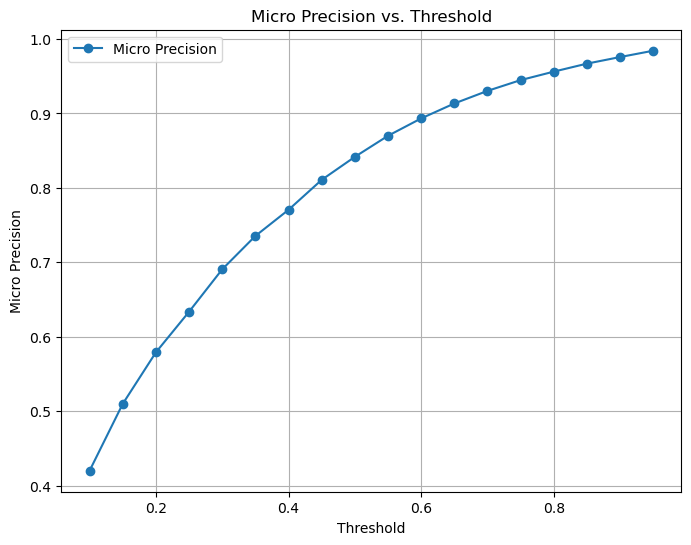

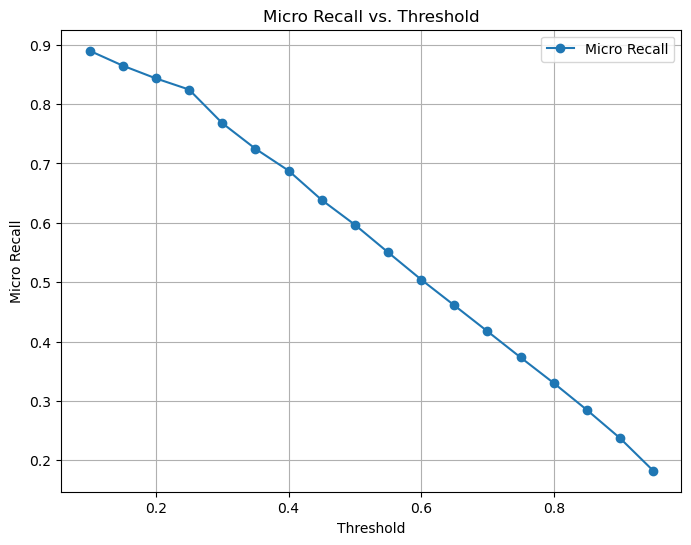

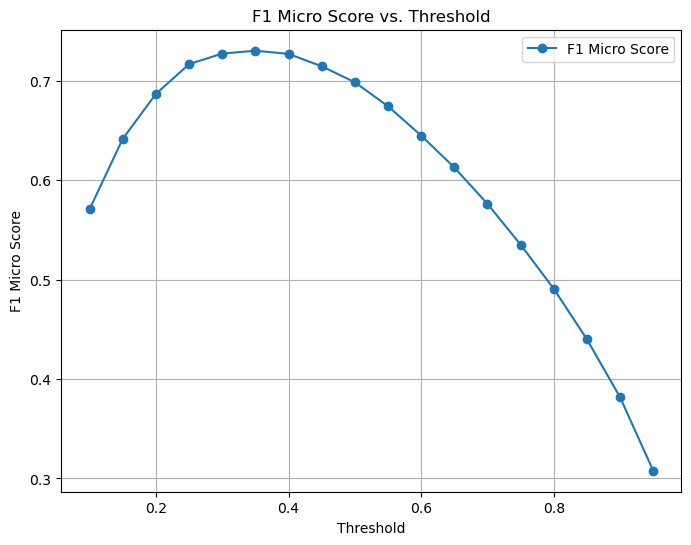

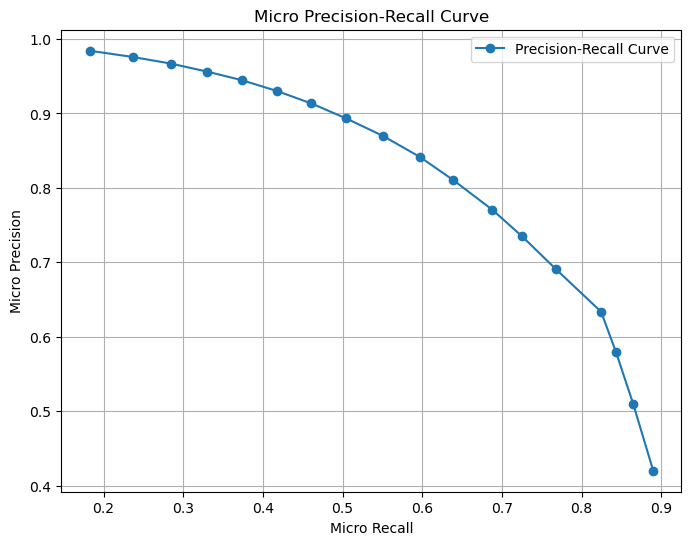

In [9]:
formatted_result_actual = []
formatted_result_pred = []
normalized_factor = 0
for i in range(1, 21):
    normalized_factor += 1/i
    
for element in full_predictions:
    single_row_pred = [0.0]*len(ALL_REDUCED_CPVS)
    single_row_actual = [0.0]*len(ALL_REDUCED_CPVS)
    cpv_found_and_scores = {}
    length_number_pred = len(element) - 1
    position = 0
    for single_pred in element:
        if 'actual_cpvs' in single_pred.keys():
            actual_values = single_pred["actual_cpvs"]
            for actual_value in actual_values:
                index_in_all_cpvs = ALL_REDUCED_CPVS.index(actual_value)
                single_row_actual[index_in_all_cpvs] = 1.0
        else:
            position += 1
            pred_values = single_pred["pred"]
            score_pred = single_pred["score"]
            for pred_value in pred_values:
                if not cpv_found_and_scores.get(pred_value):
                    cpv_found_and_scores[pred_value] = 1 / position
                else:
                    cpv_found_and_scores[pred_value] = cpv_found_and_scores[pred_value] + (1 / position)
    for key, value in cpv_found_and_scores.items():
        index_cpv = ALL_REDUCED_CPVS.index(key)
        normalized_score = value/normalized_factor
        single_row_pred[index_cpv] = normalized_score
    formatted_result_actual.append(single_row_actual)
    formatted_result_pred.append(single_row_pred)
print(formatted_result_pred[0])
calculate_metrics_and_plot(formatted_result_actual, formatted_result_pred)

## Evaluation Method 4

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5991131663322449, 0.5546371936798096, 0.0, 0.0, 0.5551028847694397, 0.0, 0.5770848989486694, 0.5539848804473877, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5485222339630127, 0.0, 0.6569411158561707, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5551028847694397, 0.0, 0.5880882143974304, 0.0, 0.0, 0.5551028847694397, 0.0, 0.5859005451202393, 0.0, 0.0, 0.0]
Best F1 Micro Score: 0.63 (Threshold: 0.80)


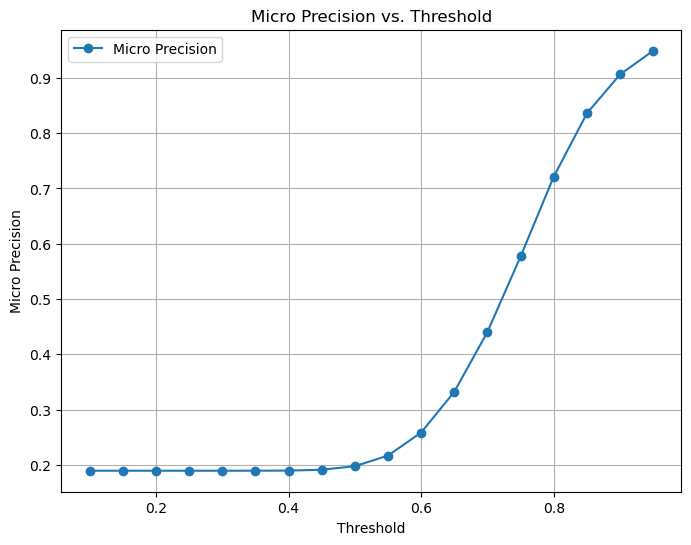

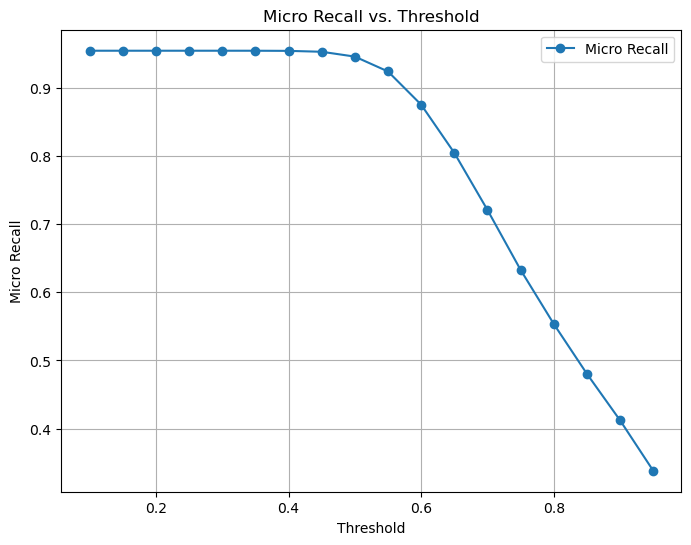

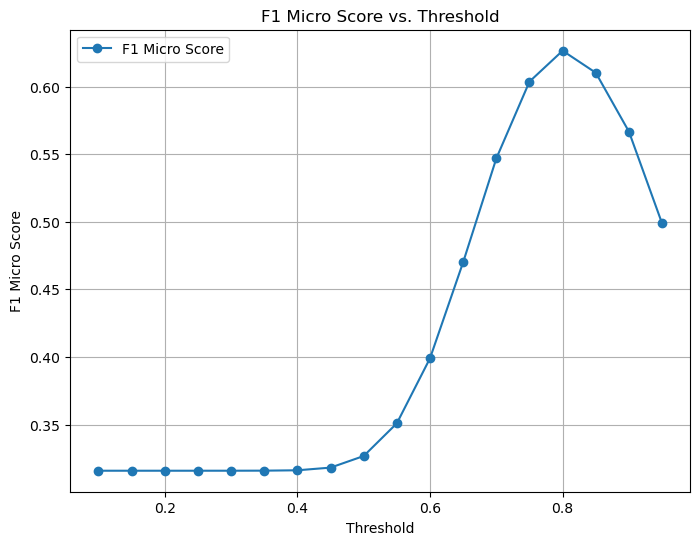

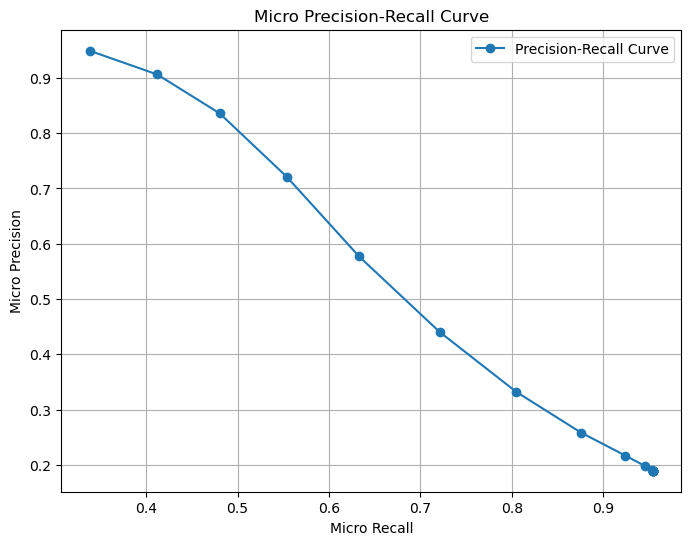

In [10]:
formatted_result_actual = []
formatted_result_pred = []

for element in full_predictions:
    single_row_pred = [0.0]*len(ALL_REDUCED_CPVS)
    single_row_actual = [0.0]*len(ALL_REDUCED_CPVS)
    cpv_found_and_scores = {}
    length_number_pred = len(element) - 1
    for single_pred in element:
        if 'actual_cpvs' in single_pred.keys():
            actual_values = single_pred["actual_cpvs"]
            for actual_value in actual_values:
                index_in_all_cpvs = ALL_REDUCED_CPVS.index(actual_value)
                single_row_actual[index_in_all_cpvs] = 1.0
        else:
            pred_values = single_pred["pred"]
            score_pred = single_pred["score"]
            for pred_value in pred_values:
                if not cpv_found_and_scores.get(pred_value):
                    cpv_found_and_scores[pred_value] = score_pred
                elif cpv_found_and_scores[pred_value] < score_pred:
                    cpv_found_and_scores[pred_value] = score_pred
    for key, value in cpv_found_and_scores.items():
        index_cpv = ALL_REDUCED_CPVS.index(key)
        #normalized_score = value/length_number_pred
        single_row_pred[index_cpv] = value
    formatted_result_actual.append(single_row_actual)
    formatted_result_pred.append(single_row_pred)
    
print(formatted_result_pred[0])
calculate_metrics_and_plot(formatted_result_actual, formatted_result_pred)

## Evaluation Method 5

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6569411158561707, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Best F1 Micro Score: 0.75 (Threshold: 0.55)


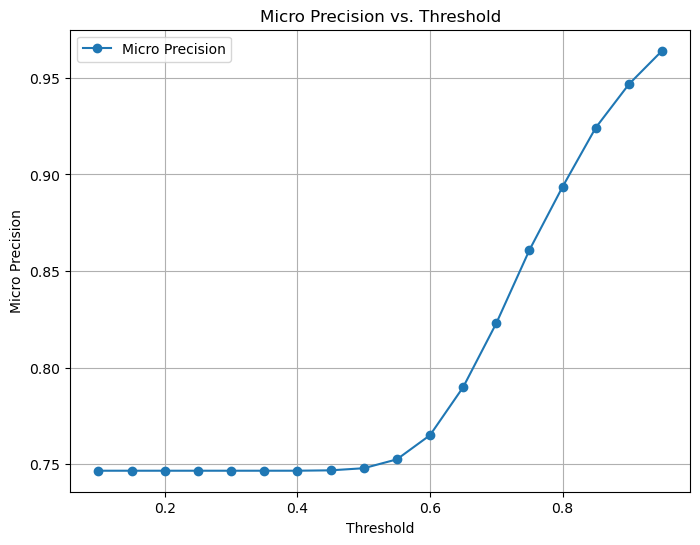

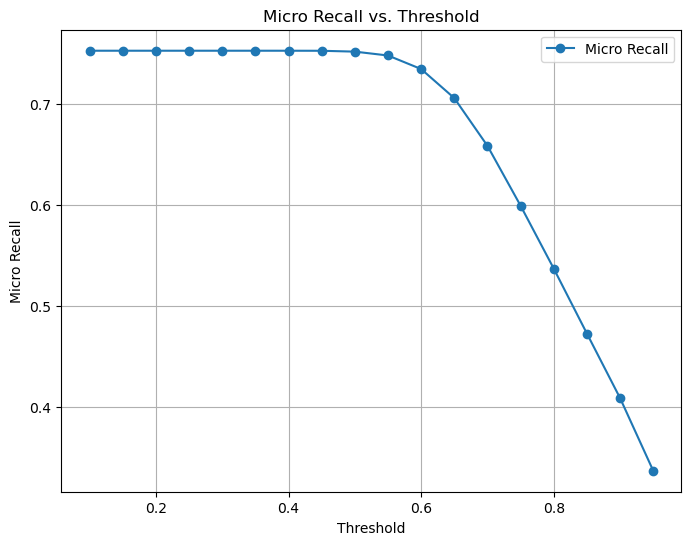

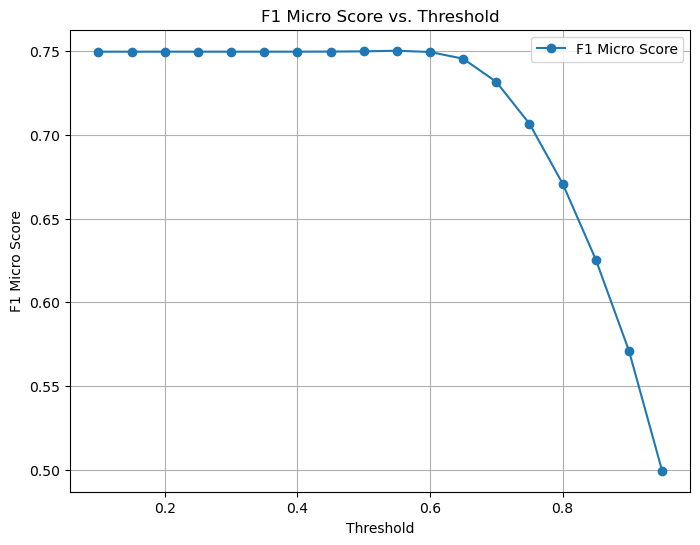

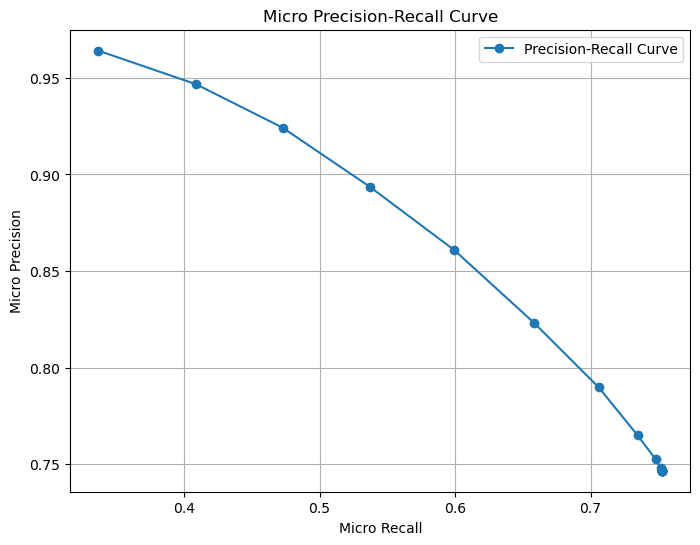

In [11]:
formatted_result_actual = []
formatted_result_pred = []

for element in full_predictions:
    single_row_pred = [0.0]*len(ALL_REDUCED_CPVS)
    single_row_actual = [0.0]*len(ALL_REDUCED_CPVS)
    cpv_found_and_scores = {}
    length_number_pred = len(element) - 1
    max_pred = []
    max_score = 0.0
    for single_pred in element:
        if 'actual_cpvs' in single_pred.keys():
            actual_values = single_pred["actual_cpvs"]
            for actual_value in actual_values:
                index_in_all_cpvs = ALL_REDUCED_CPVS.index(actual_value)
                single_row_actual[index_in_all_cpvs] = 1.0
        else:
            pred_values = single_pred["pred"]
            score_pred = single_pred["score"]
            if score_pred > max_score:
                max_score = score_pred
                max_pred = pred_values
    
    for value in max_pred:
        index_cpv = ALL_REDUCED_CPVS.index(value)
        #normalized_score = value/length_number_pred
        single_row_pred[index_cpv] = max_score
    formatted_result_actual.append(single_row_actual)
    formatted_result_pred.append(single_row_pred)
    
print(formatted_result_pred[0])
calculate_metrics_and_plot(formatted_result_actual, formatted_result_pred)

## Multi-label report of best method
Best results have been obtained with Method 2, and a threshold of 0.25. Here follows the multi-label report.

In [7]:
formatted_result_actual = []
formatted_result_pred = []
normalized_factor = 0
for i in range(1, 21):
    normalized_factor += 1/i
    
for element in full_predictions:
    single_row_pred = [0.0]*len(ALL_REDUCED_CPVS)
    single_row_actual = [0.0]*len(ALL_REDUCED_CPVS)
    cpv_found_and_scores = {}
    length_number_pred = len(element) - 1
    position = 0
    for single_pred in element:
        if 'actual_cpvs' in single_pred.keys():
            actual_values = single_pred["actual_cpvs"]
            for actual_value in actual_values:
                index_in_all_cpvs = ALL_REDUCED_CPVS.index(actual_value)
                single_row_actual[index_in_all_cpvs] = 1.0
        else:
            position += 1
            pred_values = single_pred["pred"]
            score_pred = single_pred["score"]
            for pred_value in pred_values:
                if not cpv_found_and_scores.get(pred_value):
                    cpv_found_and_scores[pred_value] = score_pred / position
                else:
                    cpv_found_and_scores[pred_value] = cpv_found_and_scores[pred_value] + (score_pred / position)
    for key, value in cpv_found_and_scores.items():
        index_cpv = ALL_REDUCED_CPVS.index(key)
        normalized_score = value/normalized_factor
        single_row_pred[index_cpv] = normalized_score
    formatted_result_actual.append(single_row_actual)
    formatted_result_pred.append(single_row_pred)

In [10]:
from sklearn import metrics

threshold = 0.25
binary_predictions = (np.array(formatted_result_pred) >= threshold).astype(int)
print(metrics.classification_report(formatted_result_actual, binary_predictions, target_names=ALL_REDUCED_CPVS))

              precision    recall  f1-score   support

          32       0.70      0.69      0.70      1838
          71       0.73      0.79      0.76      6212
          35       0.68      0.64      0.66      1437
          03       0.69      0.68      0.69       661
          38       0.79      0.80      0.79      2958
          72       0.72      0.75      0.73      5368
          48       0.71      0.70      0.71      3433
          15       0.82      0.86      0.84      1035
          24       0.75      0.63      0.68       558
          98       0.68      0.65      0.67      1710
          43       0.67      0.62      0.64       541
          34       0.78      0.77      0.77      3443
          37       0.77      0.70      0.73       399
          55       0.83      0.81      0.82       995
          63       0.73      0.65      0.69       900
          22       0.71      0.72      0.71       770
          80       0.82      0.78      0.80      2172
          14       0.64    

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
